### Project 3 : Comcast Telecom Consumer Complaints

**Description**

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

- Ticket #: Ticket number assigned to each complaint
- Customer Complaint: Description of complaint
- Date: Date of complaint
- Time: Time of complaint
- Received Via: Mode of communication of the complaint
- City: Customer city
- State: Customer state
- Zipcode: Customer zip
- Status: Status of complaint
- Filing on behalf of someone
- Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

    1.Import data into Python environment.
    2.Provide the trend chart for the number of complaints at monthly and daily granularity levels.
    3.Provide a table with the frequency of complaint types.
    4.Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
    5.Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
    6.Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
    a)Which state has the maximum complaints
    b)Which state has the highest percentage of unresolved complaints
    7.Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

#### 1.Import data into Python environment.

In [1]:
## Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Import data into Python environment
comcast_data = pd.read_csv('Comcast_telecom_complaints_data.csv')
## View the first five rows of imported data
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
# View columns, whether dataframe matches with the description given.
comcast_data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [4]:
# View shape of the dataframe
comcast_data.shape

(2224, 11)

In [5]:
# View overall summary for the count of any null objects
comcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
# View info on the dataframe
comcast_data.describe(include=object)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224
unique,2224,1841,91,91,2190,2,928,43,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,Solved,No
freq,1,83,218,218,2,1119,63,288,973,2021


From above, we can have an overall idea about the data values. For example, in the "Customer Complaint " column, they are 1841 unique type of complains, out of which "Comcast" type of complain has highest frequency with a repetition of 84 times. Also, there are no missing values in the columns, as the count remains 2224 for all the columns.

In [7]:
# Data clean up
comcast_data.drop(['Ticket #','Date'], axis=1, inplace=True)
comcast_data.sample(5)

,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2111,comcast internet service,22-Jun-15,9:42:31 AM,Customer Care Call,Ware,Massachusetts,1082,Closed,No
2199,charged for no seevice,22-May-15,7:17:11 AM,Customer Care Call,Woodridge,Illinois,60517,Closed,No
431,Unfair Billing Practices,30-Jun-15,8:18:48 PM,Customer Care Call,Chicago,Illinois,60608,Solved,No
1461,Years of packet loss and downtime,18-May-15,4:17:27 PM,Internet,Oakland Park,Florida,33309,Solved,No
636,Internet service speed,06-Feb-15,6:23:49 PM,Customer Care Call,Edmonds,Washington,98020,Closed,Yes


##### 2.Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [8]:
# Converting 'date_month_year' column into date and month

import datetime
import calendar

comcast_data['Date_month_year'] = pd.to_datetime(comcast_data['Date_month_year'])
comcast_data['Month'] = comcast_data['Date_month_year'].dt.month_name().str[:3].to_frame()
comcast_data['Date'] = comcast_data['Date_month_year'].dt.day
comcast_data['Day'] = comcast_data['Date_month_year'].dt.day_name()

comcast_data.head()

,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Date,Day
0,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,Wednesday
1,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,4,Tuesday
2,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,Saturday
3,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,5,Sunday
4,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,Tuesday


In [9]:
# Df for number of complaints at monthly granularity level.

comcast_monthly = comcast_data['Month'].value_counts().to_frame()
new_index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
comcast_monthly = comcast_monthly.reindex(new_index, axis=0).reset_index().rename(columns= {'index': 'Month','Month':'No of Complaints'})

comcast_monthly


,Month,No of Complaints
0,Jan,55
1,Feb,59
2,Mar,45
3,Apr,375
4,May,317
5,Jun,1046
6,Jul,49
7,Aug,67
8,Sep,55
9,Oct,53


In [10]:
comcast_daily = comcast_data.groupby(["Month","Day"])["Customer Complaint"].size().to_frame().reset_index().rename(columns= {'Customer Complaint': 'No of Complaints'})
comcast_daily [comcast_daily.Month=='Jan']

,Month,Day,No of Complaints
16,Jan,Monday,12
17,Jan,Sunday,18
18,Jan,Tuesday,25


Text(0.5, 1.0, 'No of Complaints based on Days of the Week')

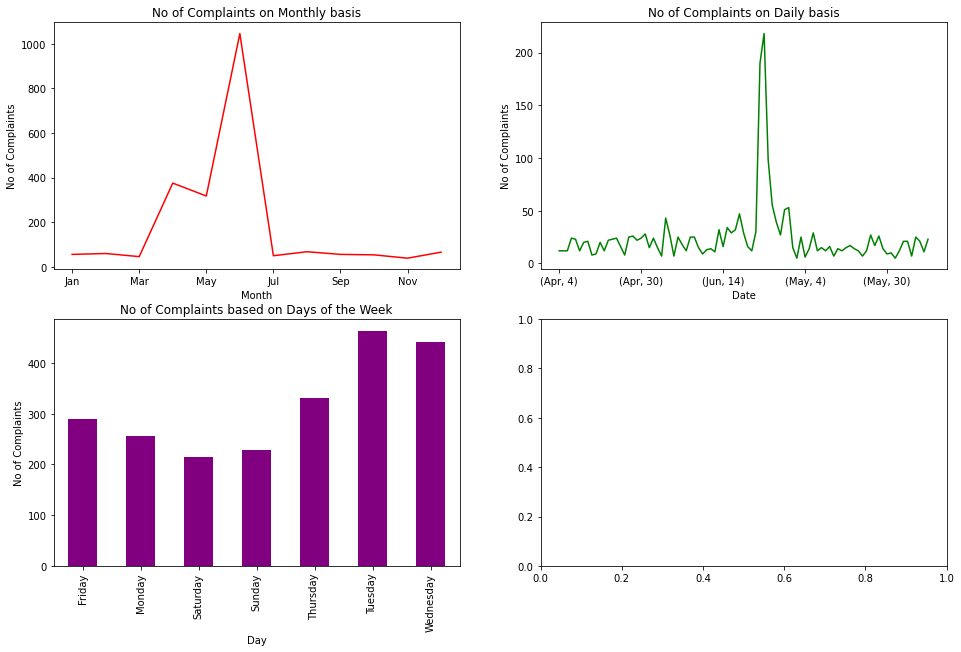

In [11]:
fig,ax = plt.subplots(2,2,figsize=(16,10))

ax1 = comcast_monthly.plot.line(x='Month',y='No of Complaints',ax=ax[0,0],color='red',legend=None)
ax1.set_xlabel('Month')
ax1.set_ylabel('No of Complaints')
ax1.set_title('No of Complaints on Monthly basis')

ax1 = comcast_data.groupby(["Month","Date"])["Customer Complaint"].size().plot(ax=ax[0,1],color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('No of Complaints')
ax1.set_title('No of Complaints on Daily basis')

ax1 = comcast_data.groupby(["Day"])["Customer Complaint"].size().plot(kind='bar',ax=ax[1,0],color='purple')
ax1.set_xlabel('Day')
ax1.set_ylabel('No of Complaints')
ax1.set_title('No of Complaints based on Days of the Week')


##### 3.Provide a table with the frequency of complaint types.

In [12]:
# Provide a table with the frequency of complaint types.
complaint_data = comcast_data['Customer Complaint'].str.upper().value_counts().reset_index().rename(columns= {'index':'Type of Complaints','Customer Complaint':'Frequency'})
complaint_data = complaint_data.nlargest(20,'Frequency')
complaint_data

,Type of Complaints,Frequency
0,COMCAST,102
1,COMCAST DATA CAP,30
2,COMCAST INTERNET,29
3,COMCAST DATA CAPS,21
4,COMCAST BILLING,18
5,COMCAST SERVICE,15
6,INTERNET SPEED,15
7,UNFAIR BILLING PRACTICES,13
8,DATA CAPS,13
9,DATA CAP,12


##### 4.Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

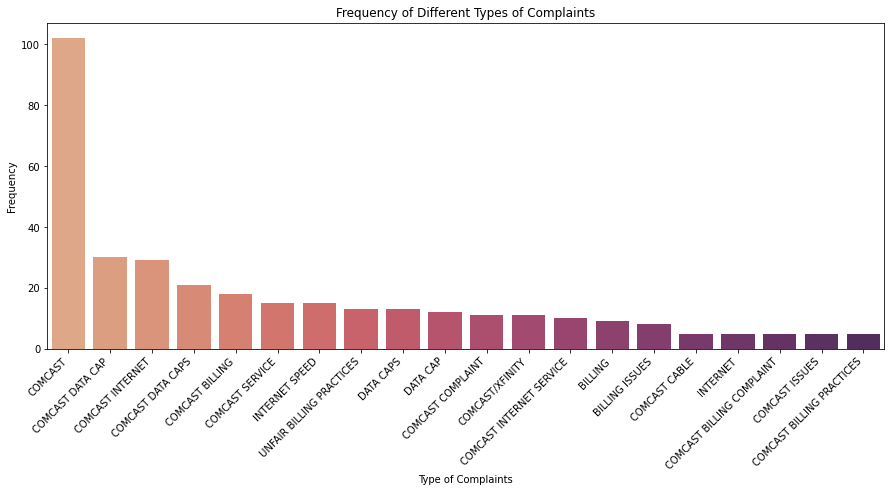

In [13]:
plt.figure(figsize=(15,6))
bar_graph = sns.barplot(x=complaint_data['Type of Complaints'],y=complaint_data.Frequency,data=complaint_data,palette = "flare")
bar_graph.set_xticklabels(bar_graph.get_xticklabels(), rotation=45, ha="right")
plt.title('Frequency of Different Types of Complaints')
plt.show()

The bar chart above shows the top 20 types of complaints made.

##### 5.Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [14]:
# Create a new categorical variable with value as Open and Closed. 
# Open & Pending is to be categorized as Open 
# Closed & Solved is to be categorized as Closed.

comcast_data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [15]:
comcast_data["Final_status"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in comcast_data["Status"]]
comcast_data.sample(5)

,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Date,Day,Final_status
346,Comcast wont refund me for over charge,2015-04-16,5:28:17 PM,Customer Care Call,Carlsbad,California,92009,Closed,No,Apr,16,Thursday,Closed
915,Charged for activation kit that was never sent...,2015-12-06,11:20:13 AM,Customer Care Call,Hydes,Maryland,21082,Closed,No,Dec,6,Sunday,Closed
398,Billing Dispute,2015-07-05,2:13:45 PM,Customer Care Call,Chicago,Illinois,60608,Solved,No,Jul,5,Sunday,Closed
234,constant disruption of internet service,2015-04-22,9:41:10 PM,Customer Care Call,Bloomington,Indiana,47401,Closed,No,Apr,22,Wednesday,Closed
83,Comcast Added Service After I Declined It,2015-08-05,8:47:45 AM,Internet,Atlanta,Georgia,30345,Solved,No,Aug,5,Wednesday,Closed


In [16]:
comcast_statusbystate = pd.crosstab(comcast_data['State'],comcast_data['Final_status'])
comcast_statusbystate

Final_status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


##### 6.Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
    a)Which state has the maximum complaints
    b)Which state has the highest percentage of unresolved complaints

<AxesSubplot:title={'center':'State wise status of complaints'}, xlabel='State'>

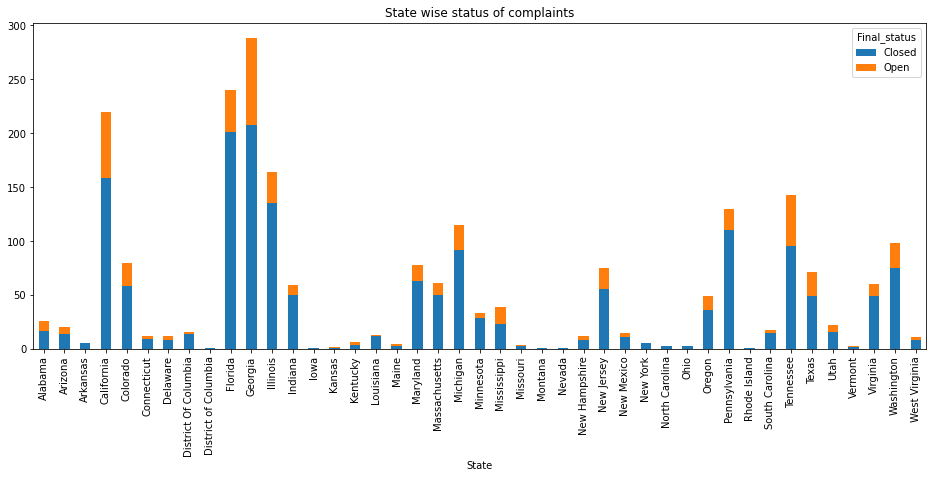

In [17]:
# a.Which state has the maximum complaints

comcast_statusbystate.plot(kind='bar',figsize=(16,6),stacked=True,title='State wise status of complaints')

From the graph above, it is clear that Georgia has the highest number of complaints.

In [18]:
# b)Which state has the highest percentage of unresolved complaints
comcast_unresolved_complaints = comcast_data[comcast_data['Final_status']=='Open']
comcast_unresolved_complaints.State.value_counts().to_frame().reset_index().rename(columns={'index':'State','State':'Frequency'})

,State,Frequency
0,Georgia,80
1,California,61
2,Tennessee,47
3,Florida,39
4,Illinois,29
5,Michigan,23
6,Washington,23
7,Texas,22
8,Colorado,22
9,Pennsylvania,20


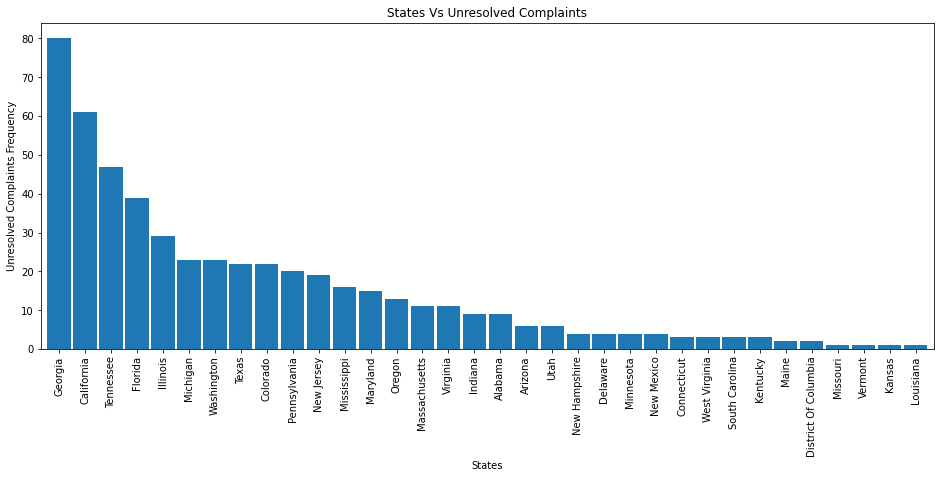

In [19]:
comcast_unresolved_complaints.State.value_counts().plot.bar(figsize=(16,6), width=0.9)
plt.title('States Vs Unresolved Complaints')
plt.ylabel('Unresolved Complaints Frequency')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()

##### 7.Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [20]:
comcast_data['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [21]:
comcast_data['Received Via'].value_counts().index[:]

Index(['Customer Care Call', 'Internet'], dtype='object')

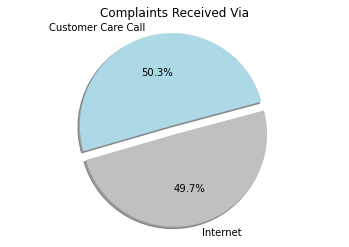

In [22]:
my_colors = ['lightblue','silver']
my_explode = (0, 0.1)

plt.pie(comcast_data['Received Via'].value_counts(),labels=comcast_data['Received Via'].unique(),autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Complaints Received Via')
plt.axis('equal')
#plt.tight_layout()
plt.show()

##### Building wordcloud

In [23]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
from wordcloud import WordCloud, STOPWORDS

final_doc = comcast_data['Customer Complaint'].dropna().tolist()
final_doc =''.join(final_doc).lower()
final_doc

'comcast cable internet speedspayment disappear - service got disconnectedspeed and servicecomcast imposed a new usage cap of 300gb that punishes streaming.comcast not working and no service to bootisp charging for arbitrary data limits with overage feesthrottling service and unreasonable data capscomcast refuses to help troubleshoot and correct my service.comcast extended outagescomcast raising prices and not being available to ask whybilling after service was asked to be disconnectedyahoo failure to restore email search featurecomcast violating open internet rules by blocking hbo go access on sony consolesinternet speedinternet disconnects every nightinternet complaintinternet availability and speedcomcast owes me $65 and claims i need to return equipment i never hadhorrible internet servicefailure to provide services that i am billed for.internet out all the time but they have a monopolyhorrible cable service and customer servicespeedcomcast monopoly bundling practicescomcast!bait a

In [25]:
# Add more stopwords
stopwords = set(STOPWORDS) 
stopwords.add('Comcast'+'comcast'+'Now'+'Company'+'Day'+'Someone'+'Thing'+'Also'+'Got'+'Way'+'Call'+'Called'+'One'+'Said'+'Tell')

In [26]:
wordcloud = WordCloud(stopwords=STOPWORDS,colormap='Spectral',width=1000,height=800).generate(final_doc)

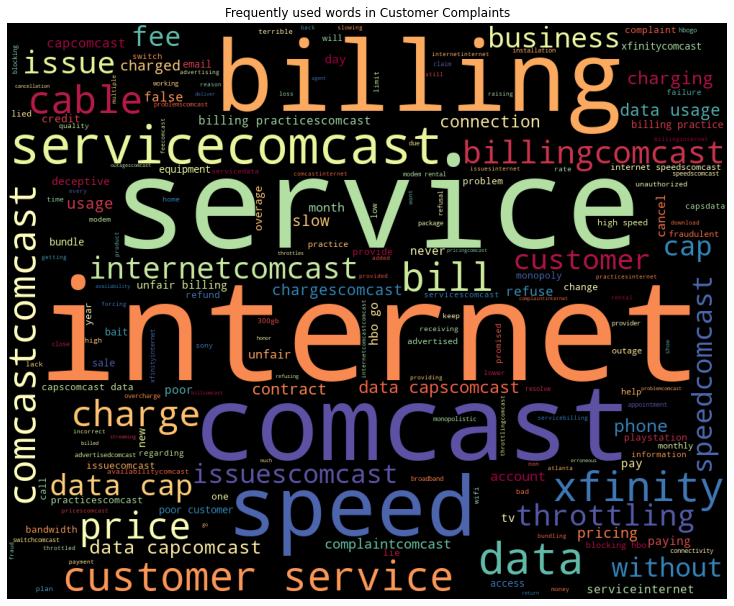

In [27]:
plt.figure( figsize=(10,12), facecolor='w' )
plt.imshow(wordcloud)
plt.title('Frequently used words in Customer Complaints')
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()

In [28]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nima\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nima\AppData\Roaming\nltk_data...


True

**The following code is adapted from "Natural Language Processing Recipes Unlocking Text Data with Machine Learning and Deep Learning using Python by Akshay Kulkarni and Adarsha Shivanan**


In [61]:
def processRow(row):
    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize
    
    tweet = row
    
    #Lower case
    tweet.lower()
    
    #Removes unicode strings like "\u002c" and "x96"
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',"r", tweet)
    tweet = re.sub(r'[^\x00-\x7f]',"r",tweet)
    
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
   
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    
    #Removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #Remove :( or :)
    tweet = tweet.replace(':)'," ")
    tweet = tweet.replace(':('," ")
    
    #remove numbers
    tweet = " ".join([i for i in tweet if not i.isdigit()])
    
    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)
    
    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)
    
    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)
    
    #lemma
    from textblob import Word
    tweet =" ".join([Word(word).lemmatize() for word in tweet.split()])
    
    #stemmer
    #st = PorterStemmer()
    #tweet=" ".join([st.stem(word) for word in tweet.split()])
    
    #Removes emoticons from text
    #tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-(|>\.<|>=\(|D:'," ", tweet)
    
    #trim
    tweet = tweet.strip('\'"')
    
    row = tweet

    return row

In [62]:
#call the function with your data
processRow(final_doc)

'c o m c a s t c a b l e i n t e r n e t s p e e d s p a y m e n t d i s a p p e a r s e r v i c e g o t d i s c o n n e c t e d s p e e d a n d s e r v i c e c o m c a s t i m p o s e d a n e w u s a g e c a p o f g b t h a t p u n i s h e s s t r e a m i n g c o m c a s t n o t w o r k i n g a n d n o s e r v i c e t o b o o t i s p c h a r g i n g f o r a r b i t r a r y d a t a l i m i t s w i t h o v e r a g e f e e s t h r o t t l i n g s e r v i c e a n d u n r e a s o n a b l e d a t a c a p s c o m c a s t r e f u s e s t o h e l p t r o u b l e s h o o t a n d c o r r e c t m y s e r v i c e c o m c a s t e x t e n d e d o u t a g e s c o m c a s t r a i s i n g p r i c e s a n d n o t b e i n g a v a i l a b l e t o a s k w h y b i l l i n g a f t e r s e r v i c e w a s a s k e d t o b e d i s c o n n e c t e d y a h o o f a i l u r e t o r e s t o r e e m a i l s e a r c h f e a t u r e c o m c a s t v i o l a t i n g o p e n i n t e r n e t r u l e s b y b l o c k i n g h

In [63]:
wordcloud = WordCloud(colormap='Spectral',width=1000,height=800).generate(final_doc)

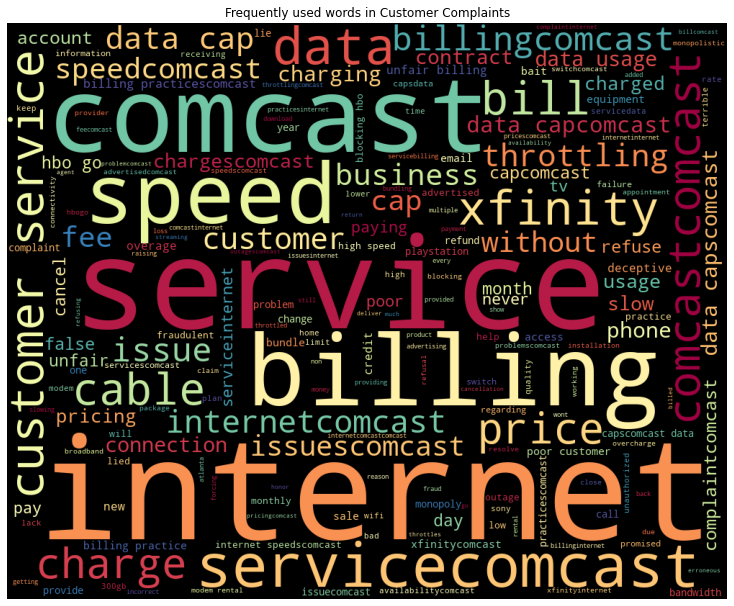

In [52]:
plt.figure( figsize=(10,12), facecolor='w' )
plt.imshow(wordcloud)
plt.title('Frequently used words in Customer Complaints')
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()